In [544]:
%matplotlib notebook

## Rotationen in 3D
### Thomas Schmelzer



### Rotationen in 3D
* Die Rotationsmatrizen $\textrm{SO}(3)$.
* Die Eulerachse 
* Quaternionen 
* Eulerwinkel und das Gimbal Lock
* SLERP

In [545]:
import matplotlib.pyplot as plt
import numpy as np

def pp(ax, point, **kwargs):
    ax.plot([0, point[0]], [0,point[1]], [0, point[2]], **kwargs)
    
    

Rotationen in 3D:
    
    $\textrm{SO}(3)$, $3 \times 3$ Matrizen, orthonormale Spalten und $\det(A) = 1$.
    
Fertig? Matrizen manchmal etwas unhandlich. $9$ Einträge, Fragen der Stabilität?


In [546]:
import numpy as np

# We construct a random element in SO(3)
def rand_so3():
    A = np.random.randn(3,3)
    # normalize the first column
    A[:,0]=A[:,0]/np.linalg.norm(A[:,0], 2)
    # make the 2nd column orthogonal to first column
    A[:,1]=A[:,1] - np.dot(A[:,0], A[:,1])*A[:,0]
    # normalize the second column
    A[:,1]=A[:,1]/np.linalg.norm(A[:,1], 2)
    # The third column is just the cross product of the first two columns => det = 1
    A[:,2]=np.cross(A[:,0],A[:,1])
    return A

A = rand_so3()
print("Determinante von A: {0}".format(np.linalg.det(A)))
print("Check if columns are orthonormal")
print(np.linalg.norm(np.dot(A.T,A)-np.eye(3),'fro'))

Determinante von A: 0.9999999999999997
Check if columns are orthonormal
7.48503140891e-16


In [547]:
from numpy.linalg import eig
import pandas as pd

for i in range(0,3):
    values, vectors = eig(rand_so3())
    d = dict()
    for i,value in enumerate(np.sort(values)):
        d[i] = {"Real": value.real, "Imag": value.imag, 
                "Abs": np.abs(value), "phi": np.angle(value, deg=True)}
    
    print("Eigenwerte von A:\n{0}\n".format(pd.DataFrame(d).transpose()[["Real","Imag","Abs","phi"]]))

Eigenwerte von A:
       Real      Imag  Abs         phi
0 -0.998953 -0.045748  1.0 -177.377916
1 -0.998953  0.045748  1.0  177.377916
2  1.000000  0.000000  1.0    0.000000

Eigenwerte von A:
       Real      Imag  Abs        phi
0  0.617411 -0.786641  1.0 -51.872707
1  0.617411  0.786641  1.0  51.872707
2  1.000000  0.000000  1.0   0.000000

Eigenwerte von A:
       Real      Imag  Abs         phi
0 -0.959322 -0.282316  1.0 -163.601533
1 -0.959322  0.282316  1.0  163.601533
2  1.000000  0.000000  1.0    0.000000



In [548]:
# There are always 3 of them! 
# one always seems to be 1
# The other two eigenvalues are $z$ and $\bar{z}$
# Can we compute $\mathbf{A}*n=n$ without too much hassle?
# What's the interpretation of n?

#A^T*n = A^T*A*n=n
#(A^T - A)*n = 0
#B = A^T-A = 0

In [549]:
A = rand_so3()

def euler_achse(A, eps=1e-10):
    assert np.abs(np.linalg.det(A)-1) < eps, "Die Determinante der Matrix A ist {0}".format(np.linalg.det(A))
    assert np.linalg.norm(np.dot(A.T,A)-np.eye(3), 'fro') < eps, "Die Matrix A ist nicht orthonormal"
    assert A.shape==(3,3), "Die Matrix A ist nicht 3 x 3"
    
    B = A.T - A
    
    n = np.zeros(3)

    n[0] = 1              # pick 1.0
    n[1] = -B[2,0]/B[2,1] # use 3rd row of matrix to fix 2nd entry of n
    n[2] = -B[1,0]/B[1,2] # use 2nd row of matrix to 

    n = n/np.linalg.norm(n,2)
    return n

n = euler_achse(A)
print(np.linalg.norm(np.dot(A,n)-n, 2))
print(n)
# Rotation in 2d in der Ebene orthogonal zum Eulerwinkel...
# aber um welchen Winkel?

# Orthogonale Transformationen lassen die Spur invariant
b = np.arccos((np.trace(A)-1)/2)
print(b)
print(180*b/np.pi)

3.12250225676e-17
[ 0.26917154 -0.02690976 -0.96271623]
1.62446129046
93.0747759259


In [550]:
# Es gibt immer einen Eigenwert 1
# Eine reelle 3 x 3 Matrix hat immer mind. einen reellen Eigenwert
# Das charakteristische Polynom einer 3x3 Matrix hat den Grad 3. 
# Ein Polynom vom Grad 3 hat mind eine reelle Nullstelle (das ist nicht wahr fuer Polynome vom Grad 2,4,6,...)
# Was können Sie über die beiden anderen Eigenwerte sagen? 
# Was können Sie über das Produkt der Eigenwerte sagen?
# Was bedeutet es geometrisch so einen Eigenwert zu haben?

# Es existiert also ein Vektor x (reell), so dass A*x = x



In [551]:
# Wir wissen nun, wie wir von einer Rotationsmatrix zur Eulerachse und dem Drehwinkel $\varphi$ kommen. 
# Der Weg zurück ist nicht weiter schwierig, aber normalerweise wollen wir eben nicht Eigenwerte und Eigenvektoren
# berechnen.

# Die Idee ist es die Rotation als Paar auch Achse und Winkel anzugeben. Das schaffen wir eben genau mit den Quaterionen.
# 4 Parameter!



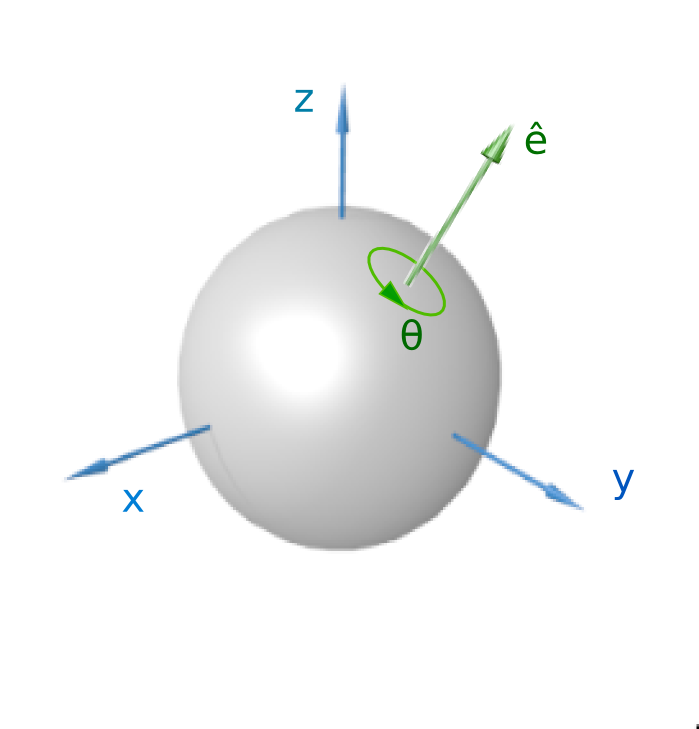

In [552]:
from IPython.display import Image
Image("Euler_AxisAngle.png")

<IPython.core.display.Javascript object>


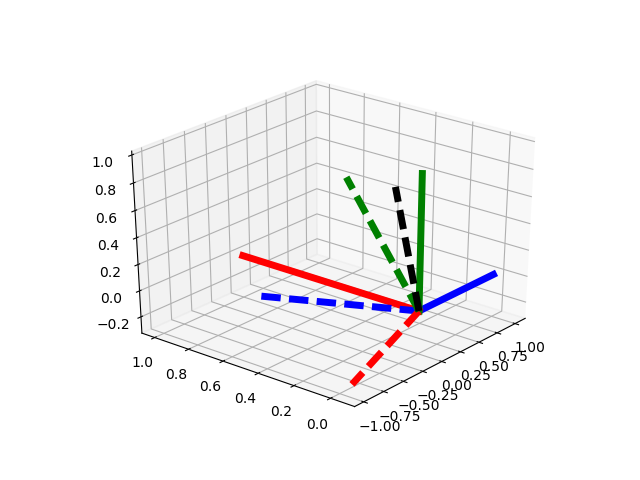

In [553]:
def baseimage3(a):
    %matplotlib notebook
    #import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    #import numpy as np
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    from numpy.linalg import eig
    values, vectors = eig(A)
    i=np.argsort(values)
    values=values[i]
    euler=vectors[:,-1].real

    pp(ax, point=np.array([1,0,0]), color="b", linewidth=5)
    pp(ax, point=np.array([0,1,0]), color="r", linewidth=5)
    pp(ax, point=np.array([0,0,1]), color="g", linewidth=5)
    pp(ax, point=a[:,0], color="b", linewidth=5, linestyle="--")
    pp(ax, point=a[:,1], color="r", linewidth=5, linestyle="--")
    pp(ax, point=a[:,2], color="g", linewidth=5, linestyle="--")
    pp(ax, point=euler, color="k", linewidth=5, linestyle="--")
        
    plt.grid()
    plt.show()

baseimage3(A)
#%matplotlib inline